---

# Regal Finance Solution : Banking Churn Analysis & Modeling

---

<b>  Problem Statement:</b><br>
    
1. Despite the continuous efforts of banks to attract and retain customers, the banking industry faces a persistent challenge in the form of customer churn, leading to financial losses and reduced customer satisfaction.<br>
2. It is advantageous for banks to know what leads a client towards the decision to leave the company.<br>
    <br>
    
    
<b>Project Objective:-</b>

1. The aim of this project is to analyze the customer churn rate for bank because it is useful to understand why the customers leave.<br>
2. After Analyzing we need to train a Machine Learning Model which can find the key factors that significantly influence the customer churn or attrition.<br>
3. In the end will choose the most reliable model that will attach a probability to the churn to make it easier for customer service to target right customer in order to minimize their efforts to prevent customers churn.<br>
<br>

<b>  Project Overview:</b><br>

1. <b>Churn refers</b> to customers leaving a bank or discontinuing their banking services.<br>
2. <b>Banking Churn Analysis</b> is a process of studying customer behavior in the banking industry to predict and understand customer attrition or churn.<br>
3. <b>Banking Churn Modeling</b> aims to identify patterns and factors that contribute to customer churn, enabling banks to take proactive measures to retain customers and improve customer satisfaction.<br></div>

---

1. <b>Importing Libraries & Dataset.</b><br>
    
    <br>
2. <b>Data Wrangling.</b><br>
    * Data Cleaning.<br>
    * Handling Missing Values.<br>
    * Handling Inconsistances.<br>
    
    <br>
3. <b>Exploratory Data Analysis (EDA)</b><br>
    * Visualizing Dependent Variable.<br>
    * Visualizing Independent Variables.<br>
    * Generating Insights.<br>
    
    <br>
4. <b>Data Preprocessing.</b><br>
    * Variable Selection and Importance.<br>
    * Feature Transformation , Scaling and Encoding.<br>
    * Splitting Data for Model Training.<br>
    * Applying SMOTE to reduce class-imbalance.<br>
    
    <br>
5. <b>Model Creation, Training and Evaluation.</b><br>
    * Selection of Classification Algorithms.<br>
    * Model Training and Tuning.<br>
    * Model Evaluation and Performance.<br>
    * Confusion Matrix Analysis.<br>
    * Accuracy, Precision, Recall, and F1 Score.<br>
    * Receiver Operating Characteristic (ROC) Curve and AUC.<br>
    * Feature Importance and Contribution.<br></div>

---

# Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE

---

# Loading Dataset

In [ ]:
df = pd.read_csv("/content/Banking Statements.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


---

# Basic Understanding of Data

***1. Checking the Dimensions of Dataset.***

In [ ]:
print("Total number of records/rows present in the dataset is:",df.shape[0])
print("Total number of attributes/columns present in the dataset is:",df.shape[1])

Total number of records/rows present in the dataset is: 10000
Total number of attributes/columns present in the dataset is: 14


---

***2. Fetching the Attributes Names.***

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<h3 align="left"><font color=brown>📊 Inference:</font></h3>
    
1. **RowNumber:** It is likely a unique identifier for each record and does not contribute directly to the analysis.
2. **CustomerId:** It can be used to track and differentiate individual customers within the dataset.
3. **Surname:** It provides information about the family name of each customer.
4. **CreditScore:** It is a numerical value that assesses the creditworthiness of an individual based on their credit history and financial behavior.
5. **Geography:** It provides information about the customers' geographic distribution, allowing for analysis based on regional or national factors.
6. **Gender:** It categorizes customers as either male or female, enabling gender-based analysis if relevant to the churn prediction.
7. **Age:** It represents the customer's age in years and can be used to analyze age-related patterns and behaviors.
8. **Tenure:** It typically represents the number of years or months the customer has been associated with the bank.
9. **Balance:** It reflects the amount of money in the customer's bank account at a specific point in time.
10. **NumOfProducts:** It can include various offerings such as savings accounts, loans, credit cards, etc.
11. **HasCrCard:** It is a binary variable with a value of 1 if the customer possesses a credit card and 0 otherwise.
12. **IsActiveMember:** It is a binary variable indicating whether the customer is an active member (1) or not (0) within the bank.
13. **EstimatedSalary:** It provides an approximation of the customer's income level, which can be relevant for analyzing churn behavior.
14. **Exited:** It indicates whether a customer has churned (1) or not (0) from the bank. It is the variable we aim to predict using the other features.

---

***3. Generating Basic Information of the data.***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There is total **10000 records** and **14 columns** availabe in the dataset.
* **Out of 14 columns** there are **11 numerical columns** and **3 categorical columns.**</div>

---

***4. Computing Total No. of Missing Values.***

In [ ]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **None** of the columns is having **missing values.**
* So we **don't** have to perform **Data Imputation.**

---

***5. Checking Duplicate Records.***

In [ ]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There are **no duplicate records** present in the dataset.
* So we can say there is no **Data Lekage** in the dataset.

---

***6. Performing Descriptive Statistical Analysis on Categorical Columns.***

In [ ]:
df.describe(include="object").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Surname column** is having **very high cardinality** and **not relevant** for predicting **customer churned or not.** So we can **simply drop this feature.**
* **Geography & Gender** Columns are having **low cardinality** and **seems relevant** for predicting **customer churned or not.**

---

# Data Wrangling


* **Data wrangling**, also known as **data munging**, refers to the process of **cleaning, transforming, and preparing raw data for analysis.**
* It involves **handling missing values**, **addressing inconsistencies** and **formatting data** before it can be used for **further analysis**.

***1. Showing Random Sample of Data.***

In [ ]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2026,2027,15603088,Rossi,451,Spain,Female,23,9,0.00,2,0,1,48021.71,0
8826,8827,15570194,Ikemefuna,412,France,Male,29,5,0.00,2,0,0,12510.53,0
4413,4414,15596575,Vale,615,Germany,Male,39,5,113193.51,2,1,1,52166.25,0
2444,2445,15572461,Kung,663,Germany,Female,29,4,102714.65,2,0,0,21170.81,0
3853,3854,15631392,Douglas,654,Germany,Male,43,9,84673.17,2,0,1,82081.35,0


<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **RowNumber** and **CustomerId** columns **represents a unique value** for each customer and **doesn't seem relevant** for predicting **customer churned or not.**
* **Surname** column is having **high cardinality* and **doesn't seems relevant** for predicting **customer churned or not.**
* So we can simply **drop** these features.

---

***2. Dropping Insignificant Features.***

In [ ]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

---

***3. Renaming Target Variable name and its values with more appropirate values for better Analysis.***

In [ ]:
df.rename(columns={"Exited":"Churned"},inplace=True)

In [ ]:
df["Churned"].replace({0:"No",1:"Yes"},inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* We have **converted raw data** into **well-structured data** to better analysis.
* So we can perform **Expolatory Data Analysis** and **derive insights from the data.**</div>

---

# Exploratory Data Analysis


***1. Visualizing Target Variable.***

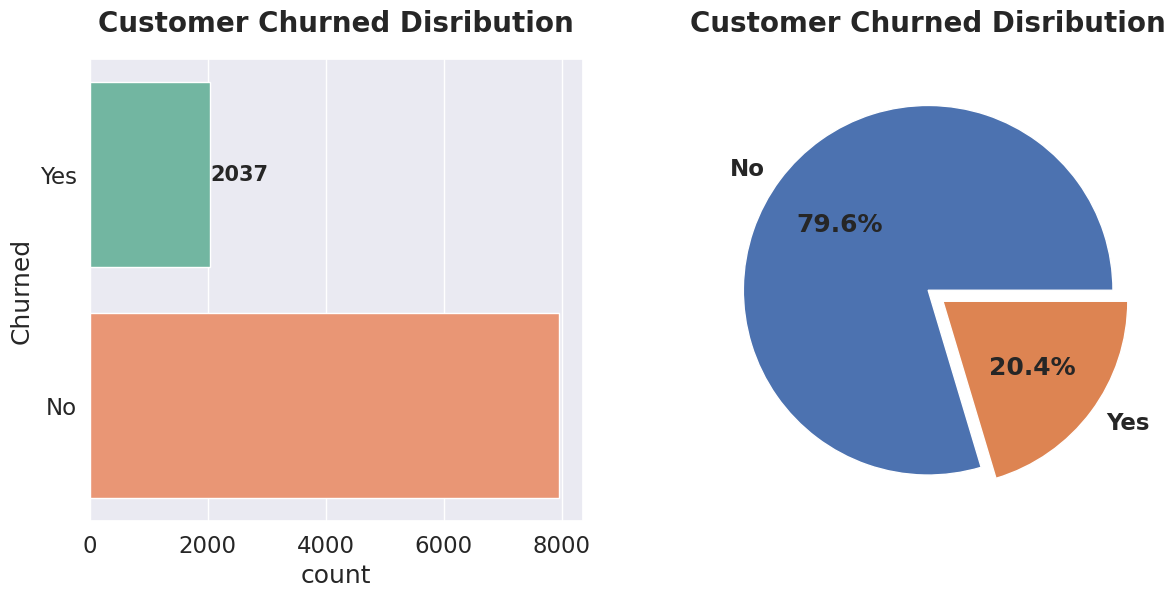

In [ ]:
count = df["Churned"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(df["Churned"],palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)
plt.show()

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There is **huge class-imbalance** which can lead to **bias in model performance.**
* So to **overcome** this **class-imbalance** we have to use **over-sampling technique** from **SMOTE**.

---

***2. Visualizing Customer Churned by Gender.***

In [ ]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=df, hue="Churned",palette="Set2")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)

    plt.title(f"Customer Churned by {column}",fontweight="black",size=20,pad=20)
    plt.show()

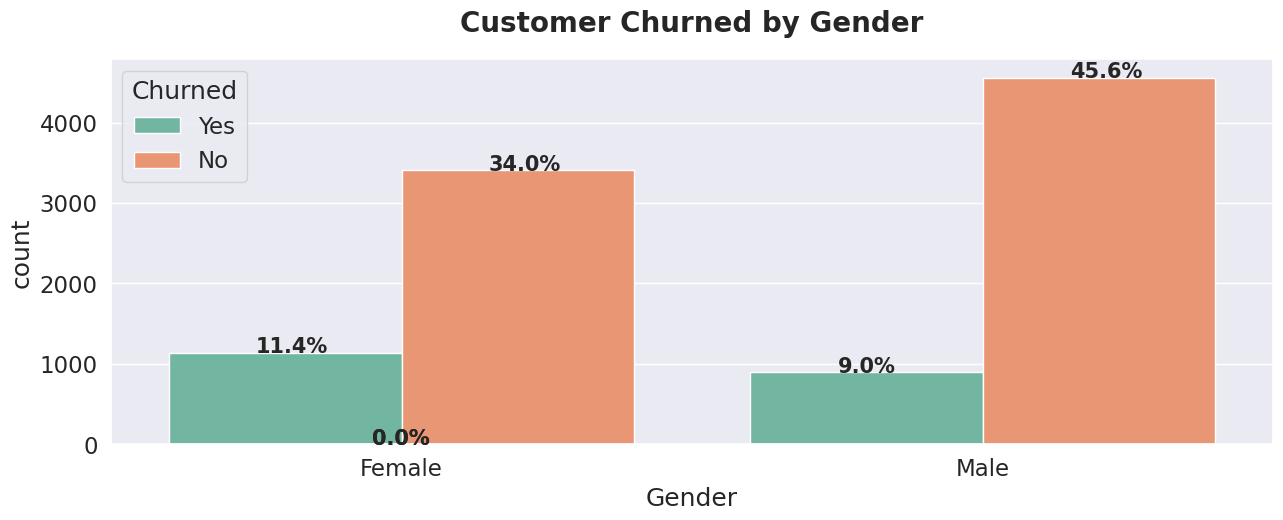

In [ ]:
countplot("Gender")

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* The **churned probabillity** is more for **Feamle Customers** compared to **male customers**.
* Which means **female customers** are **more deactivating their banking facilities** compared to **male customers.**

    
<h3 align="left"><font color=brown>📊 Recommendation:</font></h3>

* Bank can **Develop targeted marketing campaigns** specifically tailored to **female customers.**
* Bank can **Focus on enhancing** the overall **customer experience** for **female customers.**

---

***3. Visualizing Customer Churned by Geoprahical Region***

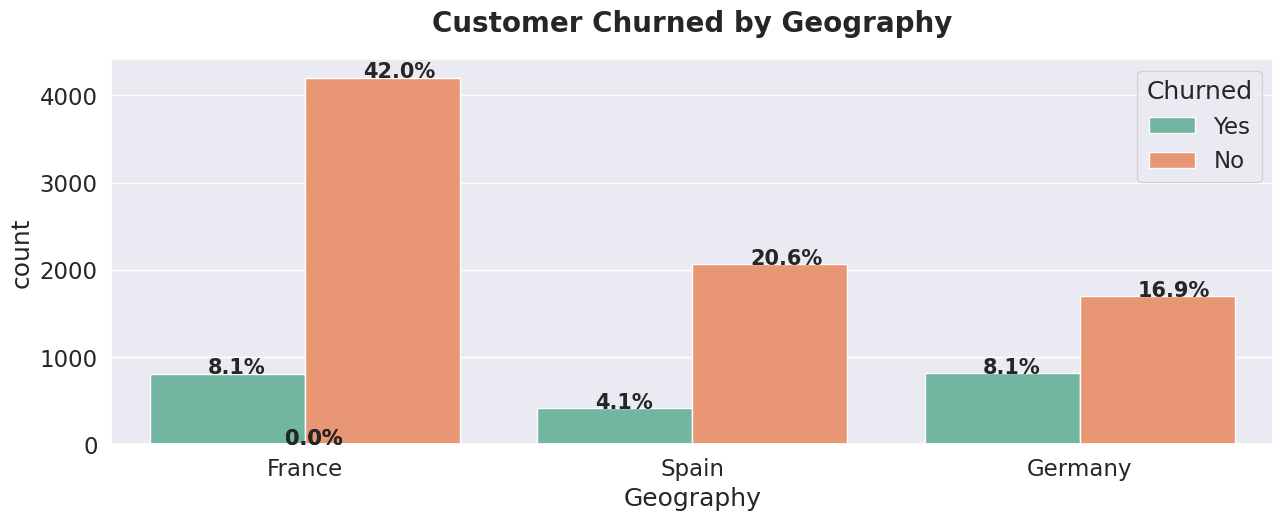

In [ ]:
countplot("Geography")

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Half of the customers** are from **France** followed by Germany and Spain.
* Despite of the **huge total customers difference** between France & Germany the **churned rate** for **France and Germany** customers are **same.**
* There are **almost equal customers** from **Spain & Germany**, but the **Churn rate** is **almost double** in **Germany** when **compared with spain.**
    
<h3 align="left"><font color=brown>📊 Recommendation:</font></h3>
    
* Bank can **analyze** the **banking facilites & behaviour** of **customers from france** and try to **implement those on Germany customers.**

---

***4. Visualizing Customer Churn by "HasCrCard".***

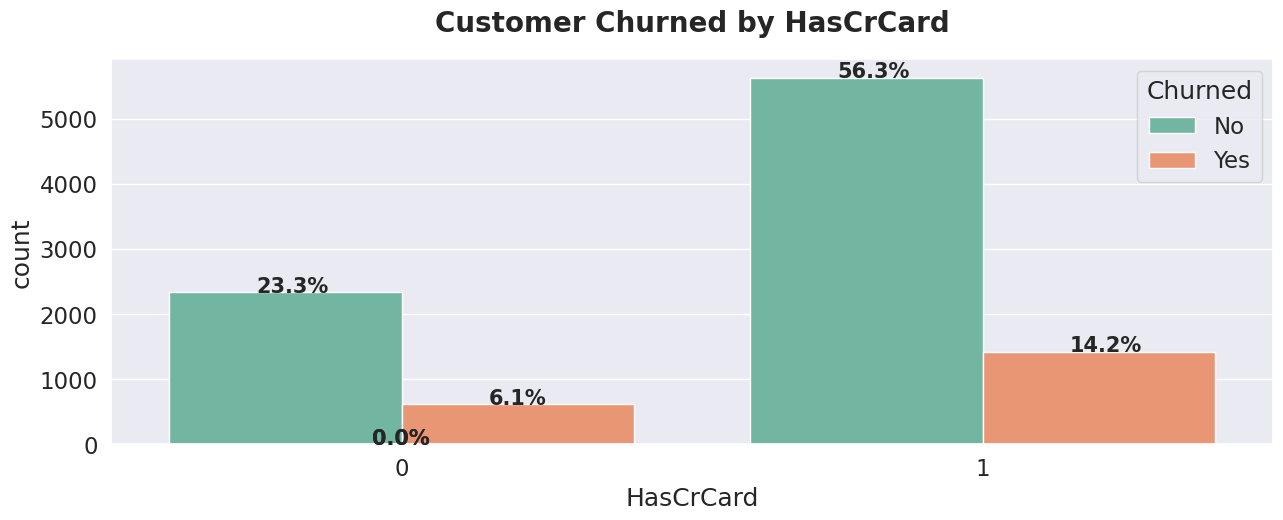

In [ ]:
countplot("HasCrCard")

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **More than 70%** of customers are having **credit card.**
* The **churn probability value** for the **both** the categories is **almost 1:4.**
* So **credit card is not affecting the churn of customers.**

---

***5. Visualizing Customer Churned by "NumOfProducts".***

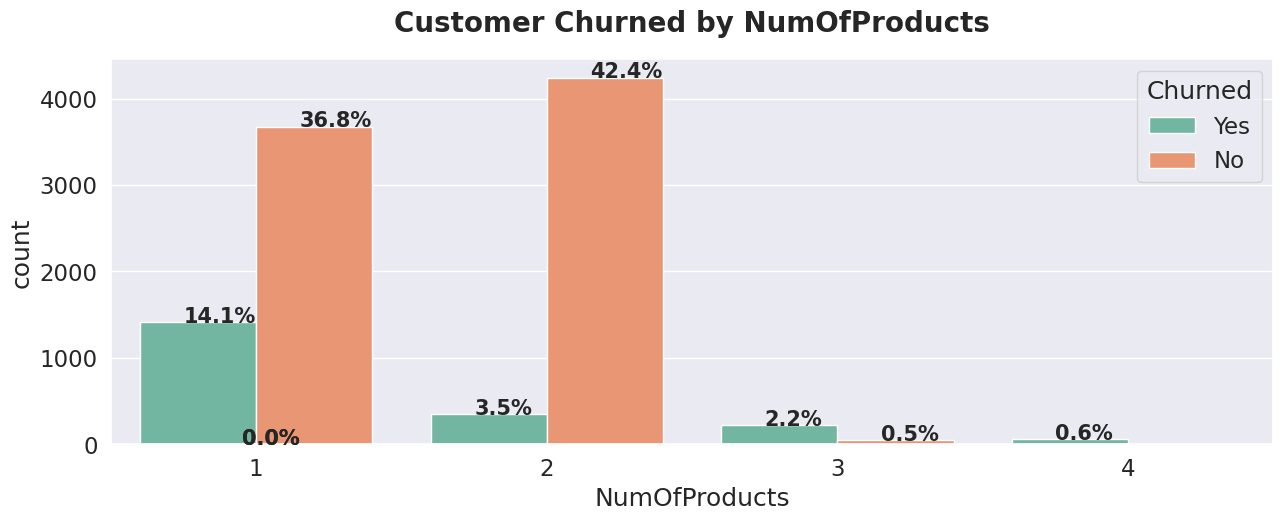

In [ ]:
countplot("NumOfProducts")

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Most** of the customers are having **either 1 or 2** total number of banking products.
* **Very few** customers are having **more than 2** total number of banking products.
* **The lowest churn rate** is with customers having **only 2 products.**
* There is **very high churn rate** in customers having **1 product** or **more than 2 products.**
* **Note:**
    1. We can do **feature engineering** by **grouping the customers having products more than 2 together** to **reduce the class imbalance.**
    2. Because **Class Imbalance** leads to **bias in model** and **misrepresentation of minority class.**
    

<h3 align="left"><font color=brown>📊 Recommendation:</font></h3>

* The **bank can try to convince the customers** to have **atleast 2 banking products.**
* They can provide **Rewards and Incentives** to the **customers having atleast 2 banking products.**

---


***6. Visualizing Customer Churned by "IsActiveMember".***

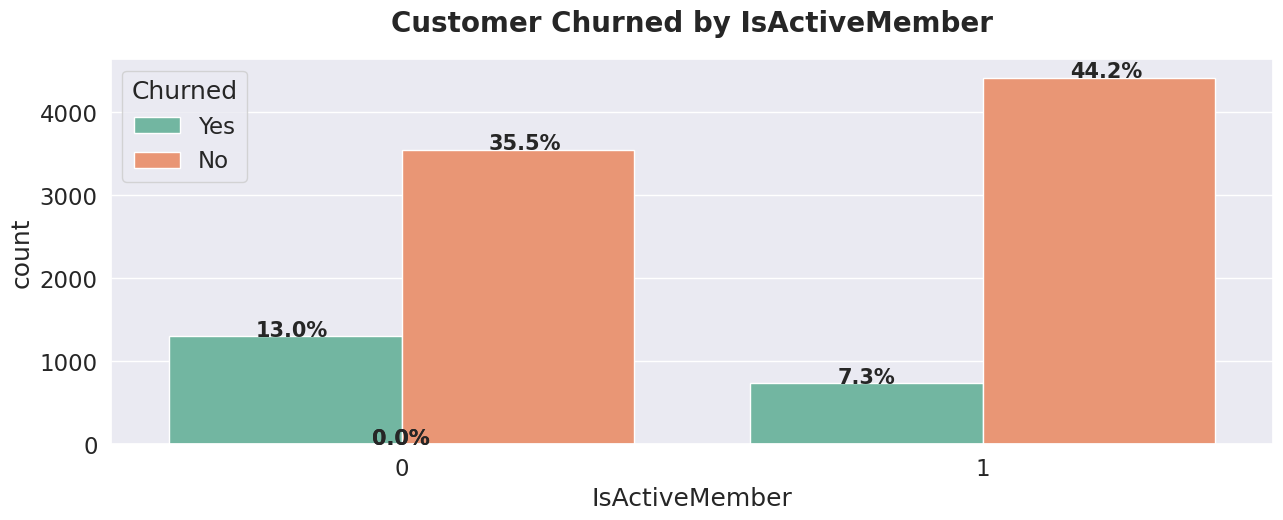

In [ ]:
countplot("IsActiveMember")

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There is **approxiamately equal customer** who are **either active or not active.**
* But the **churn rate %** in **not active customers is almost double** compared to **active customers.**
* So **customers which are not active are morely likely to deactivate their banking facilities.**

<h3 align="left"><font color=brown>📊 Recommendation:</font></h3>
    
* Bank can provide **Regular Communication and Updates**, and **Enhanced Digital Services** so that customers remain active to the banking facilities.

---

***7. Visualizing Customer Churned by "Tenure".***

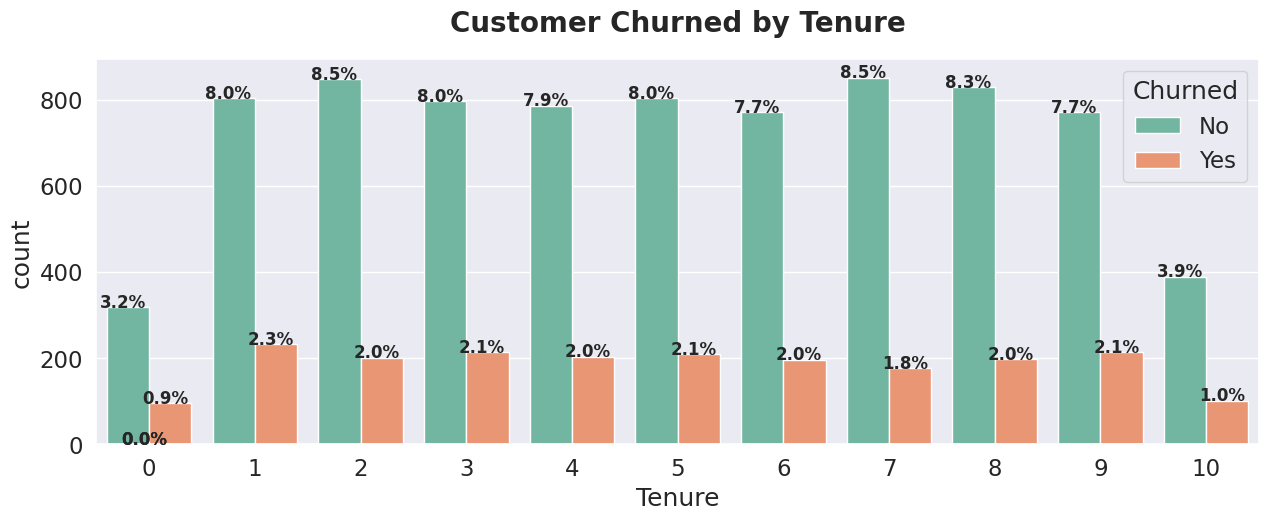

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="Tenure", data=df, hue="Churned",palette="Set2")
for value in ax.patches:
    percentage = "{:.1f}%".format(100*value.get_height()/len(df["Tenure"]))
    x = value.get_x() + value.get_width() / 2 - 0.05
    y = value.get_y() + value.get_height()
    ax.annotate(percentage, (x,y), fontweight="black",size=12, ha="center")

plt.title("Customer Churned by Tenure",fontweight="black",size=20,pad=20)
plt.show()

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* The **highest tenure is 10 years** which means that those customers have **opened their account 10 years back.**
* Since there is **almost similar distribution of churn status** we can't make any specific inference.

---

***8. Visualizing Customer Churned by "CreditScore".***

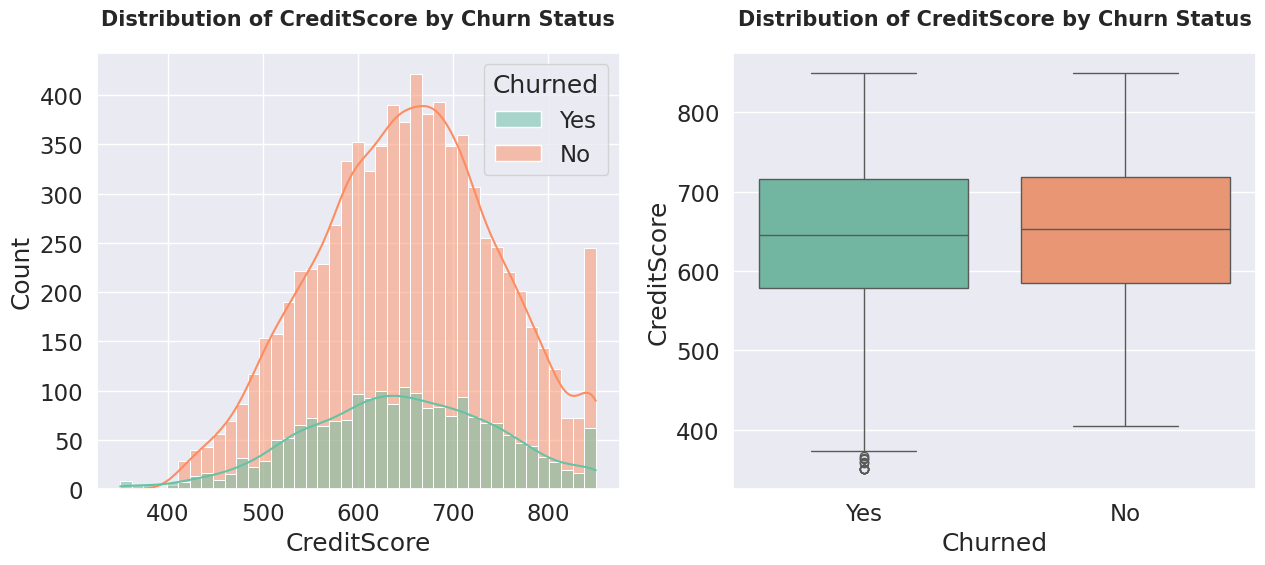

In [ ]:
def continous_plot(column):
    plt.figure(figsize=(13, 6))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(x=column, hue="Churned", data=df, kde=True, palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status", fontweight="black", pad=20, size=15)

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x="Churned", y=column, data=df, palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status", fontweight="black", pad=20, size=15)

    plt.tight_layout()
    plt.show()

# Call the function
continous_plot("CreditScore")


<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* The **Median CreditScore** of **both churned** and **not churned** customers are **approxiamately equal.**
* Since the **values are approximately equal** for both **churn status** we can't generate any **relevant inference.**

---

***9. Visualizing Customer Churned by "Age".***

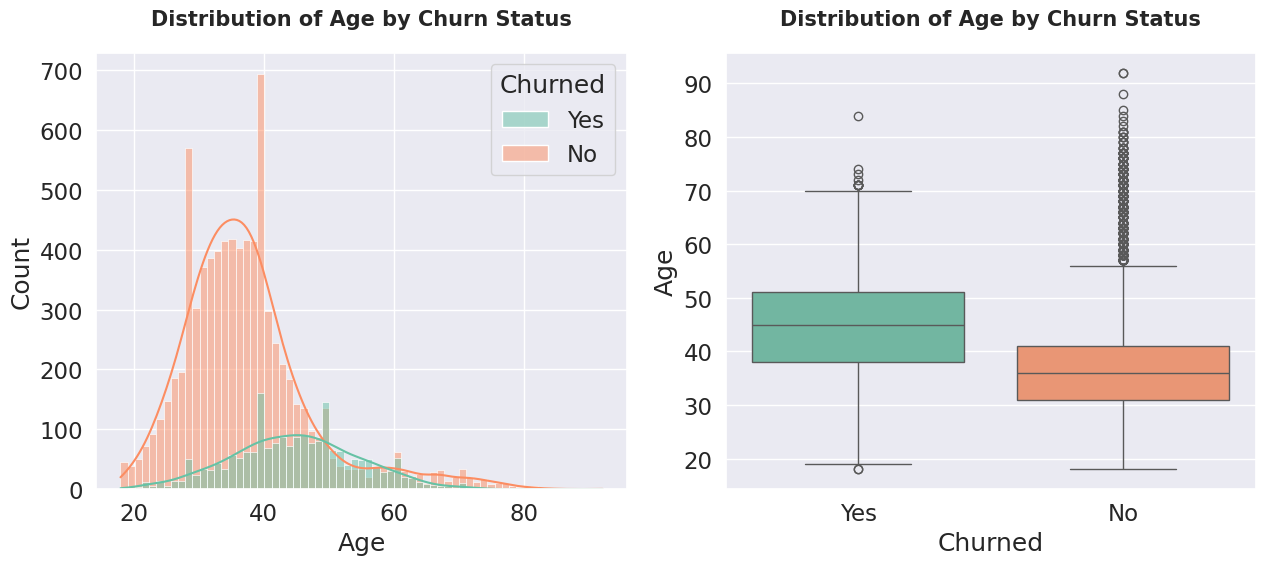

In [ ]:
continous_plot("Age")

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* The **distribution is right skewed** because of **presence of outliers** which can lead to **overfitting in model.**
* To **overcome this right-skewed distribution** we can use **log normal transformation** technique to bring a **normal distribution.**

---

***10. Visualizing Customer Churned by "Balance."***

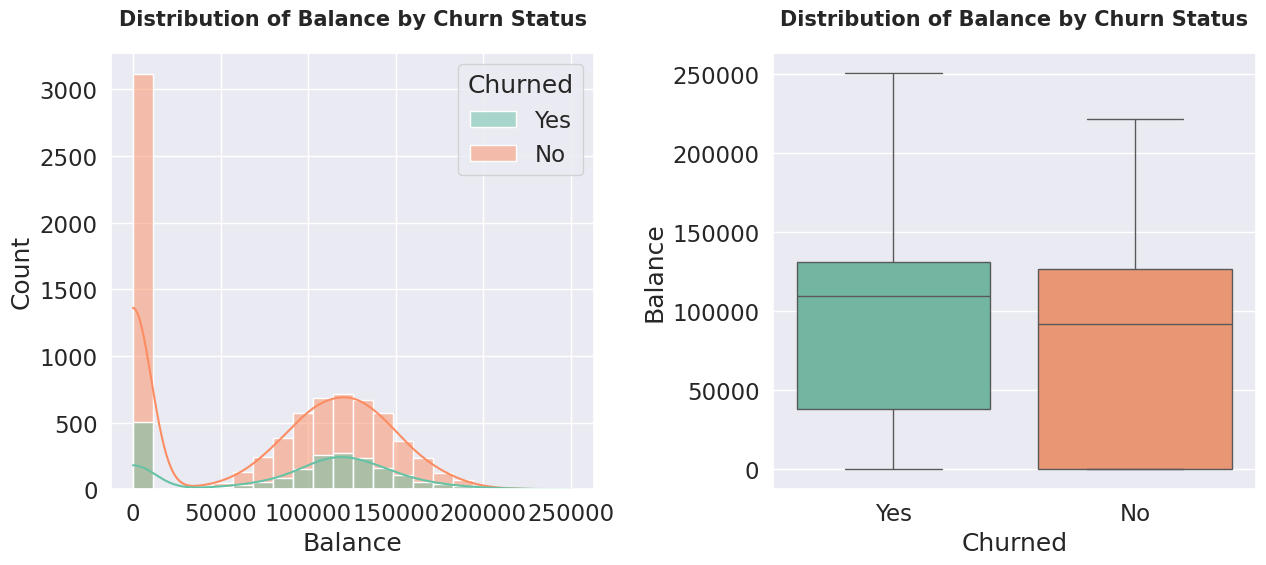

In [ ]:
continous_plot("Balance")

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **More than 3000 customers** are having their **account balance equal to zero.**
* Customers with **zero balance** are more likely to **deactivate their account.**
* **Excluding the zero value** we can observe a **normal distribution.** So don't have to use any other techniques.
    

 * **Note:-**
    * We can do **Feature Engineering** by **grouping** the customers with account **balance equal to 0** and **balance more than 0 separately.**

---

***11. Visualizing Customer Churned by "Estimated Salary".***

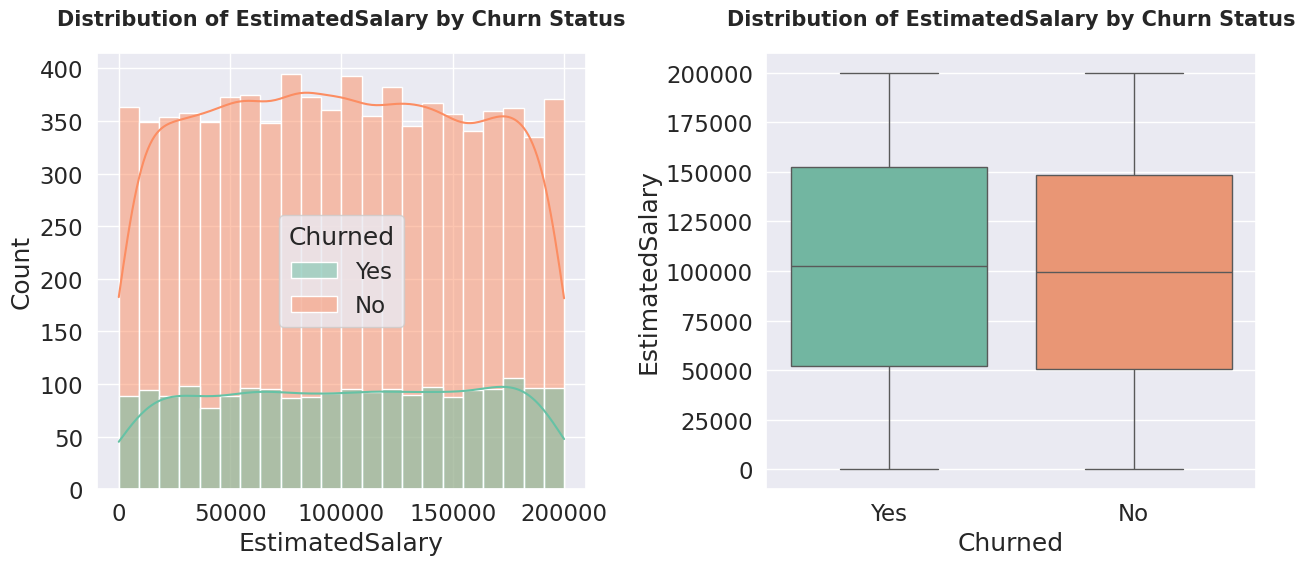

In [ ]:
continous_plot("EstimatedSalary")

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* The **median value of EstimatedSalary** is **approxiamately same** for both the **churned categories.**
* Since the distribution is **kind of similar** for **both churn category** we can't make any **relevant inference.**

---

# Feature Engineering

***1. Creating New Feature From "NumOfProducts" Feature.***

In [ ]:
conditions = [(df["NumOfProducts"]==1), (df["NumOfProducts"]==2), (df["NumOfProducts"]>2)]
values =     ["One product","Two Products","More Than 2 Products"]

In [ ]:
df["Total_Products"] = np.select(conditions,values)

In [ ]:
df.drop(columns="NumOfProducts", inplace=True)

---

***Visualizing The New Feature "Total_Products".***

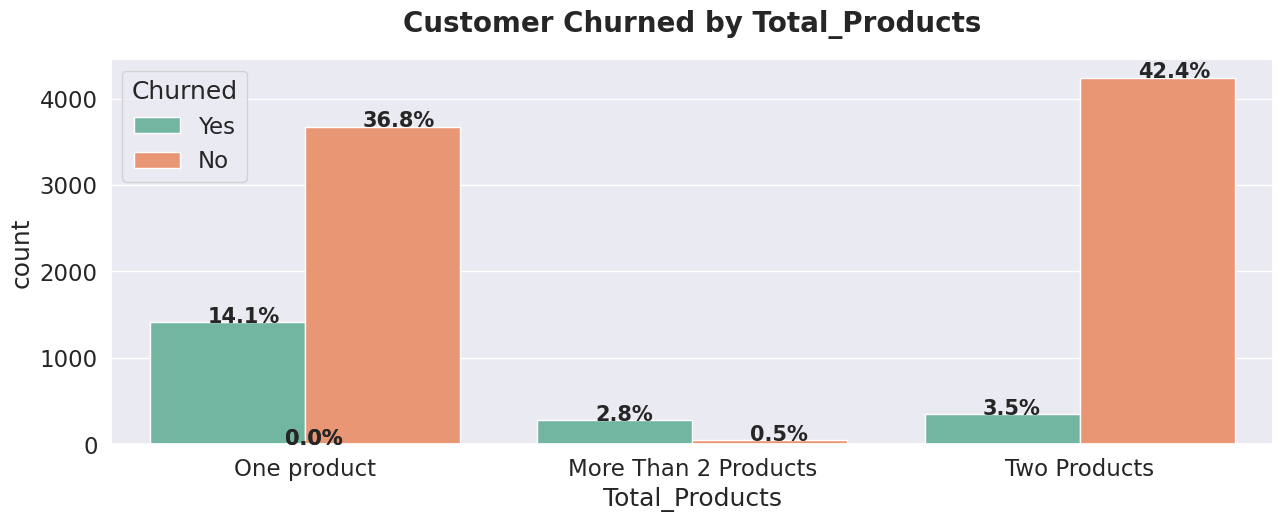

In [ ]:
countplot("Total_Products")

---

***2. Creating New Feature From "Balance" Feature.***

In [ ]:
conditions = [(df["Balance"]==0), (df["Balance"]>0)]
values = ["Zero Balance","More Than zero Balance"]

In [ ]:
df["Account_Balance"] = np.select(conditions, values)

In [ ]:
df.drop(columns="Balance",inplace=True)

---

***Visualizing The New Feature "Account_Balance"***

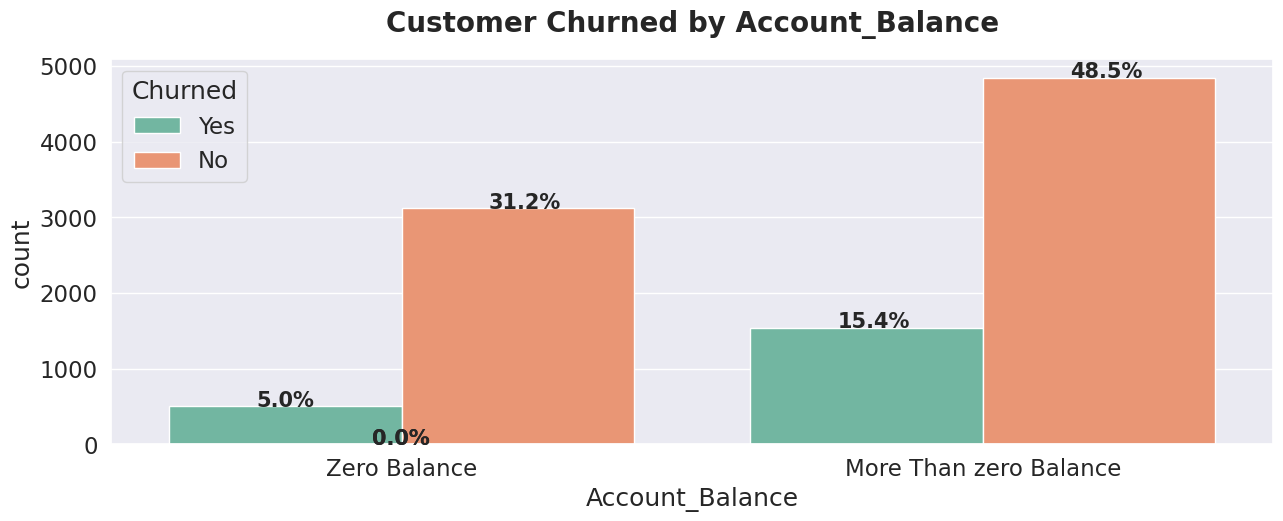

In [ ]:
countplot("Account_Balance")

---

# Data Preprocessing

***1. Computing Unique Values of Categorical Columns.***

In [ ]:
cat_cols = ["Geography","Gender","Total_Products","Account_Balance"]

for column in cat_cols:
    print(f"Unique Values in {column} column is:",df[column].unique())
    print("-"*100,"\n")

Unique Values in Geography column is: ['France' 'Spain' 'Germany']
---------------------------------------------------------------------------------------------------- 

Unique Values in Gender column is: ['Female' 'Male']
---------------------------------------------------------------------------------------------------- 

Unique Values in Total_Products column is: ['One product' 'More Than 2 Products' 'Two Products']
---------------------------------------------------------------------------------------------------- 

Unique Values in Account_Balance column is: ['Zero Balance' 'More Than zero Balance']
---------------------------------------------------------------------------------------------------- 



---

***2. Performing One Hot Encoding on Categorical Features.***

In [ ]:
df = pd.get_dummies(columns=cat_cols, data=df)

---

***3. Encoding Target Variable.***

In [ ]:
df["Churned"].replace({"No":0,"Yes":1},inplace=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products,Account_Balance_More Than zero Balance,Account_Balance_Zero Balance
0,619,42,2,1,1,101348.88,1,True,False,False,True,False,False,True,False,False,True
1,608,41,1,0,1,112542.58,0,False,False,True,True,False,False,True,False,True,False
2,502,42,8,1,0,113931.57,1,True,False,False,True,False,True,False,False,True,False
3,699,39,1,0,0,93826.63,0,True,False,False,True,False,False,False,True,False,True
4,850,43,2,1,1,79084.10,0,False,False,True,True,False,False,True,False,True,False


---

# 4. Checking Skewness of Continous Features.

In [ ]:
cols = ["CreditScore","Age","EstimatedSalary"]

In [ ]:
df[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

,Feature Skewness
CreditScore,-0.071607
Age,1.011320
EstimatedSalary,0.002085


<h3 align="left"><font color=brown>📊 Inference:</font></h3>

    
* **Age Feature** is **highly right-skewed** , which conveys that there is presence of **positive outliers.**
* **Skewness** can **negatively impact** the **performance** of certain machine learning algorithms, like **DecisionTree & Linear Models.**
* To overcome the **right-skewed distribution** we can use **log normal transformation** to achieve a **normal distribution.**

---

***4. Performing Log Transformation on Age Column.***

In [ ]:
old_age = df["Age"]     ##Storing the previous Age values to compare these values with the transformed values.

In [ ]:
df["Age"] = np.log(df["Age"])

---

***5. Visualizing Age Before and After Transformation.***

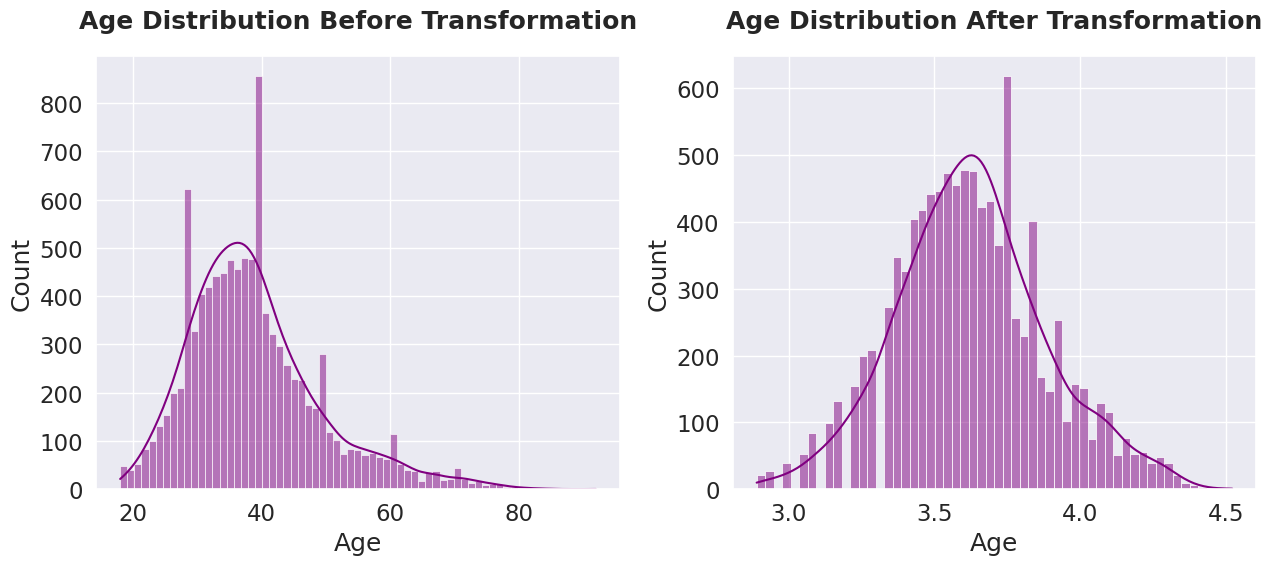

In [ ]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(old_age, color="purple", kde=True)
plt.title("Age Distribution Before Transformation",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
sns.histplot(df["Age"], color="purple", kde=True)
plt.title("Age Distribution After Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

    
* After applying **log normal transformation** the **age feature has achieved** a **normal distribution.**
* This will **help model** to find more **relevant patterns** and build a more **accurate model.**

---

***6. Segregating Features & Labels for Model Training***

In [ ]:
X = df.drop(columns=["Churned"])
y = df["Churned"]

---

***7. Splitting Data For Model Training & Testing.***

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (8000, 16)
Shape of x_test is:  (2000, 16)
Shape of y_train is: (8000,)
Shape of y_test is:  (2000,)


<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Data is **equally splitted** for **Model Training & Testing.**
* So we can build a **Predictive Model** to find the **key factors** that are significantly influencing **customers churn.**</div>

---

***8. Applying SMOTE to Overcome the Class-Imbalance in Target Variable.***

In [ ]:
smt = SMOTE(random_state=42)

In [ ]:
x_train_resampled,y_train_resampled = smt.fit_resample(x_train,y_train)

In [ ]:
print(x_train_resampled.shape ,y_train_resampled.shape)

(12736, 16) (12736,)


In [ ]:
y_train_resampled.value_counts().to_frame()

,count
Churned,
0,6368
1,6368


<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Both the categories** in Target variable are now having **equal number of records.**
* So we can **train the Model** pn **balanced records** for both churn categories and make a predictive model with **low bias.**

---

# Model Creation using DecisionTree

***1. Performing Grid-Search with cross-validation to find the best Parameters for the Model.***

In [61]:
dtree = DecisionTreeClassifier()

In [62]:
param_grid = {"max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "min_samples_leaf":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"],
              "splitter":["best","random"],
              "max_features":["auto",None],
              "random_state":[0,42]}

In [63]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train_resampled,y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']})

---

***2. Fetching the Best Parameters for DecisionTree Model.***

In [64]:
best_parameters = grid_search.best_params_

print("Best Parameters for DecisionTree Model is:\n\n")
best_parameters

Best Parameters for DecisionTree Model is:




{'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'random_state': 0,
 'splitter': 'random'}

---

***3. Creating DecisionTree Model Using Best Parameters.***

In [65]:
dtree = DecisionTreeClassifier(**best_parameters)

dtree.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier(max_depth=10, min_samples_split=8, random_state=0,
                       splitter='random')

***4. Computing Model Accuracy***

In [66]:
y_train_pred = dtree.predict(x_train_resampled)
y_test_pred = dtree.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train_resampled,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 89.85 %
Accuracy Score of Model on Testing Data  is => 83.65 %


***5. Model Evaluation using Different Metric Values.***

In [67]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred,average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred,average="micro"))

F1 Score of the Model is => 0.8365
Recall Score of the Model is => 0.8365
Precision Score of the Model is => 0.8365


<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* We can observe that **recall, precision, and F1 score are all the same**, it means that our** model is achieving perfect balance between** correctly identifying **positive samples (recall)** and minimizing **false positives (precision).**

    
* The **high values** for **F1 score, recall score, and precision score**, all of which are **approximately 0.8.** These **metrics suggest** that the **model achieves good accuracy** in predicting the **positive class.**

---

6. Finding Importance of Features in DecisionTreeClassifier

In [68]:
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":dtree.feature_importances_})

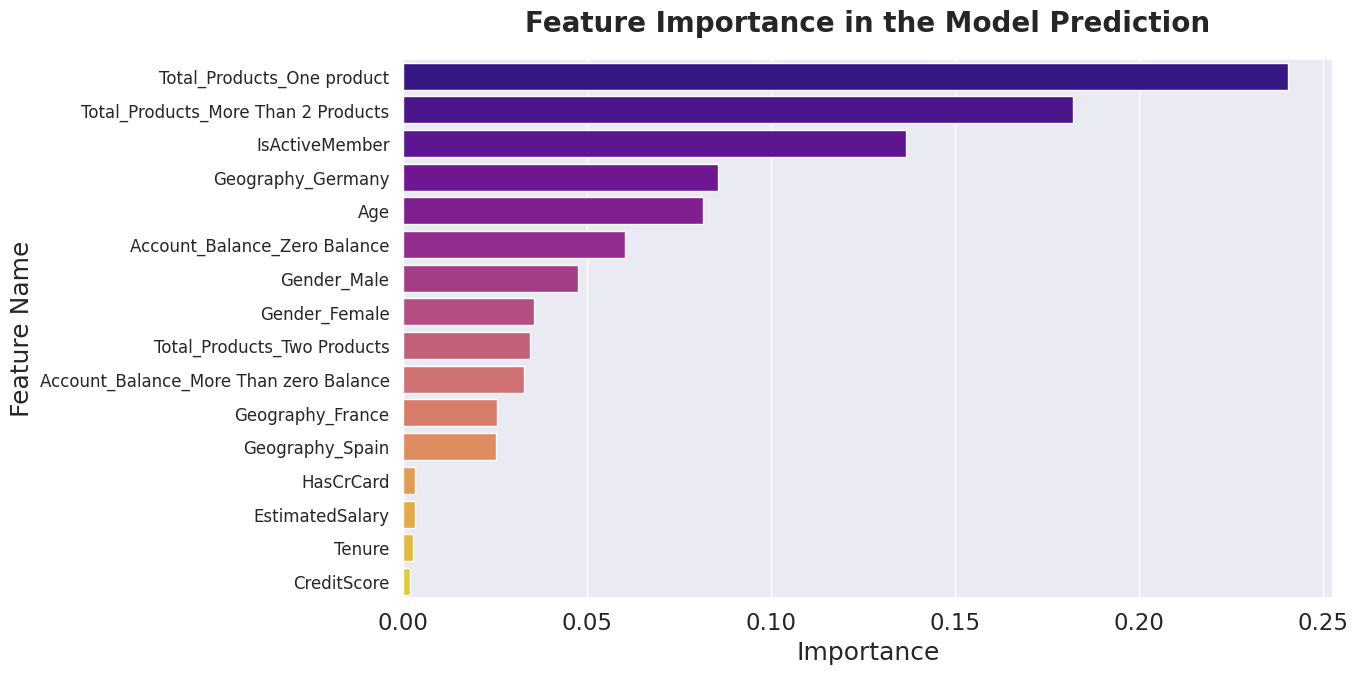

In [69]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* The **key factors** that significantly influence the **deactivation of customers banking facilities** are:-
    * **`Total_Products`**, **`Age`**, **`IsActiveMember`**, **`Geography`**, **`Balance`** and **`Gender.`**
    
    
* The **minimal impact** of features on the **deactivation of customers' banking facilities** are:-
    * **`CreditScore`**, **`HasCrCard`**, **`Tenure`** and **`EstimatedSalary`**

---

8. Model Evaluation using Confusion Matrix.

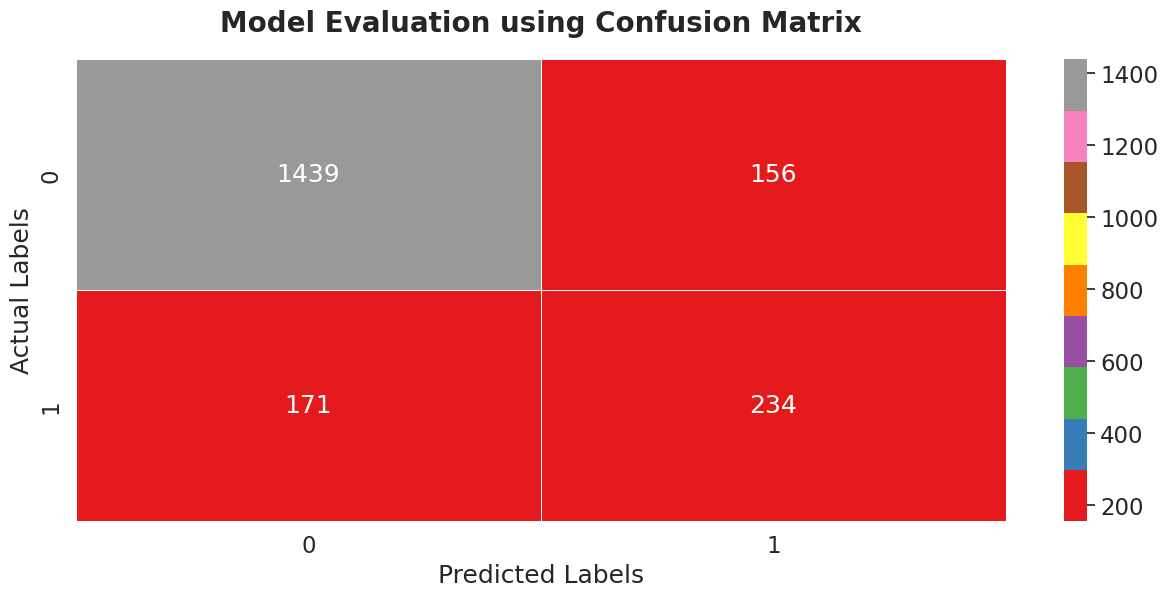

In [72]:
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Strong True Positive Rate:** The model achieved a high number of true positive predictions, indicating its ability to correctly identify positive cases. This suggests that the model is effective in accurately classifying the desired outcome.

    
* **Need of Improvement in False Negative Rate:** The presence of a relatively high number of false negatives suggests that the model may have missed identifying some actual positive cases. This indicates a need for further refinement to enhance the model's ability to capture all positive cases.</div>

---

8. Model Evaluation: ROC Curve and Area Under the Curve (AUC)

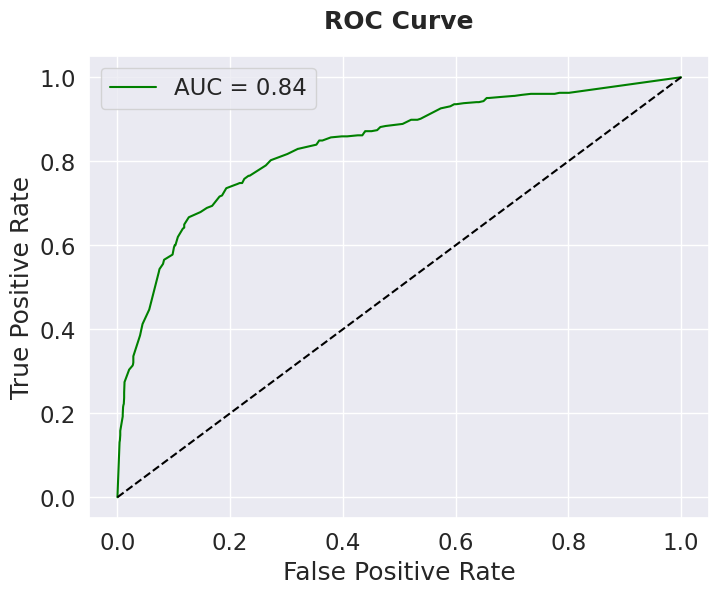

In [73]:
y_pred_proba = dtree.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

    
1. An **AUC (Area Under the Curve) value of 0.84** suggests that the model has **strong discriminative power.**
2. This suggests that the model has a **high ability to distinguish between positive and negative instances**, indicating its effectiveness in making accurate predictions.
3. The **model has a relatively high probability** of ranking a randomly selected positive instance higher than a randomly selected negative instance.

---

# Model Creation using RandomForest

1. Performing Grid-Search with cross-validation to find the best Parameters for the Model.

In [74]:
rfc = RandomForestClassifier()

In [75]:
param_grid = {"max_depth":[3,4,5,6,7,8],
              "min_samples_split":[3,4,5,6,7,8],
              "min_samples_leaf":[3,4,5,6,7,8],
              "n_estimators": [50,70,90,100],
              "criterion":["gini","entropy"]}

In [ ]:
grid_search = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train_resampled,y_train_resampled)

---

2. Fetching the Best Parameters for RandomForest Model.

In [ ]:
best_parameters = grid_search.best_params_

print("Best Parameters for RandomForest Model is:\n\n")
best_parameters

---

3. Creating RandomForest Model Using Best Parameters.

In [ ]:
rfc = RandomForestClassifier(**best_parameters)

rfc.fit(x_train_resampled,y_train_resampled)

4. Computing Model Accuracy.

In [ ]:
y_train_pred = rfc.predict(x_train_resampled)
y_test_pred  = rfc.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train_resampled,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

5. Model Evaluation using Different Metric Values.

In [ ]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred,average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred,average="micro"))

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* We can observe that **recall, precision, and F1 score are all the same**, it means that our** model is achieving perfect balance between** correctly identifying **positive samples (recall)** and minimizing **false positives (precision).**

    
* The **high values** for **F1 score, recall score, and precision score**, all of which are **approximately 0.8.** These **metrics suggest** that the **model achieves good accuracy** in predicting the **positive class.**

---

6. Finding Importance of Features in RandomForest Model.

In [ ]:
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":rfc.feature_importances_})

In [ ]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* The **key factors** that significantly influence the **deactivation of customers banking facilities** are:-
    * **`Total_Products`**, **`Age`**, **`IsActiveMember`**, **`Geography`**, **`Gende`** and **`Balance`.**
    
    
* The **minimal impact** of features on the **deactivation of customers' banking facilities** are:-
    * **`HasCrCard`**, **`Tenure`**, **`CreditScore`** and **`EstimatedSalary`**

---

***7. SHAP Summary Plot: Explaining Model Predictions with Feature Importance.***

In [ ]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_test)

plt.title("Feature Importance and Effects on Predictions",fontweight="black",pad=20,size=18)
shap.summary_plot(shap_values[1], x_test.values, feature_names = x_test.columns,plot_size=(14,8))

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* The **red color represents high feature values**, indicating that the **feature positively contributes** for **increasing the prediction value.**
* The **blue color represents low feature values,** indicating that the **feature negatively contributes** for **decreasing the prediction value.**

---

8. Model Evaluation using Confusion Matrix.

In [ ]:
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Strong True Positive Rate:** The model achieved a high number of true positive predictions, indicating its ability to correctly identify positive cases. This suggests that the model is effective in accurately classifying the desired outcome.

    
* **Need of Improvement in False Negative Rate:** The presence of a relatively high number of false negatives suggests that the model may have missed identifying some actual positive cases. This indicates a need for further refinement to enhance the model's ability to capture all positive cases.</div>

---

9. Model Evaluation: ROC Curve and Area Under the Curve (AUC)

In [ ]:
y_pred_proba = rfc.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

    
1. An **AUC (Area Under the Curve) value of 0.86** suggests that the model has **strong discriminative power.**
2. This suggests that the model has a **high ability to distinguish between positive and negative instances**, indicating its effectiveness in making accurate predictions.
3. The **model has a relatively high probability** of ranking a randomly selected positive instance higher than a randomly selected negative instance.

---

# Conclusion

<h3 align="left"><font color=brown>📊 Key-Points</font></h3>

    
* The **key factors** that significantly influence the **deactivation of customers banking facilities** are **Total_Products, Age, IsActiveMember**, **Gender** and **Geography.**

    
* **High Training and Testing Accuracies:** Both the model achieved a high accuracy score near to 90% on the training data, indicating a good fit to the training instances. Additionally, the model's accuracy score near to 85% on the testing data suggests its ability to generalize well to unseen instances.
    
    
* **High F1 Score, Recall, and Precision:** The model achieved high F1 score, recall, and precision values, all approximately 0.8. This indicates that the model has a strong ability to correctly identify positive cases while minimizing false positives and maximizing true positives.


* **High AUC value more than 0.8**, states that the model demonstrates a reasonably good discriminatory power. It suggests that the model is able to distinguish between positive and negative instances with a relatively high degree of accuracy.
    
    
* **Overall Model Performance:** The model demonstrates strong performance across multiple evaluation metrics, indicating its effectiveness in making accurate predictions and capturing the desired outcomes.

<h3 align="left"><font color="brown">📊 Recommendations</font></h3>

1. The **bank** can try to convince customers to have **at least 2 banking products**, but **not less than that**.
2. The **bank** can launch a **scheme for customers with higher ages (Senior Citizens)** so that they do not deactivate their **banking facilities**.
3. The **bank** can provide:
   - **Rewards and Incentive Programs**
   - **Regular Communication and Updates**
   - **Enhanced Digital Services**

   These initiatives will help ensure that customers remain active with the bank's facilities.


---